In [2]:
import os
import glob
from skimage import io,img_as_ubyte    
from skimage.transform import resize


i = 0
os.mkdir('Resized') 
path = "train/*.jpeg*"
for image in glob.glob(path):
    
    # Reading image as grey(numpy array of flaot64)
    grey_img = io.imread(image,as_gray=True)
    #print(grey_img.shape) print -> (y,x,c)->(height,width,no_of_channels)
    
    # Resizing to (256,256)
    img_resized = resize(grey_img,(256,256),anti_aliasing=False)
    
    #converting float64 numpy array to uint8
    img_8bit = img_as_ubyte(img_resized) 
    
    io.imsave("Resized/image%05i.jpeg" %i, img_8bit)
    i += 1

<ipython-input-2-ba3aa1f4fab4>:16: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (365, 549, 3) looks like an RGB image
  threshold = filters.threshold_otsu(image)


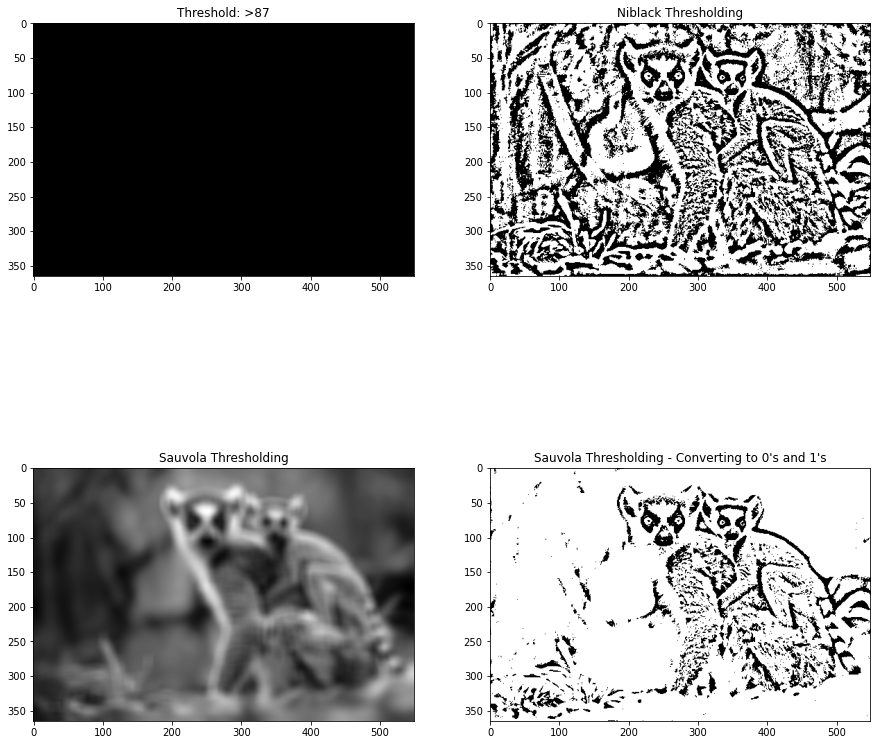

In [2]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
# coffee = data.coffee()
image = plt.imread('train1/ILSVRC2012_val_00005026.JPEG')
gray_image = rgb2gray(image)

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(image)

# Computing binarized values using the obtained
# threshold
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_image)

# Computing binarized values using the obtained
# threshold
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_image)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")
